# RED WINE

## Data Cleaning

In [21]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix
#from sklearn import metrics
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#from itertools import combinations
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.feature_selection import RFECV
#from sklearn.utils import resample
#from sklearn.neighbors import KNeighborsClassifier
#import xgboost as xgb
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV
#import itertools
#from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [2]:
# Load and preview 'winequality-red.csv' dataset

df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Examine shape of dataset

df.shape

(1599, 12)

In [4]:
# Check datatypes in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Check for null values in the dataset

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Check for duplicates

df.duplicated().sum()

240

In [9]:
# Drop duplicate rows from dataset

df = df.drop_duplicates()

In [10]:
# Check the updated shape of the datset

df.shape

(1359, 12)

## Exploratory Data Analysis

In [11]:
# Explore statistical summary of dataset

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Visualize the Data

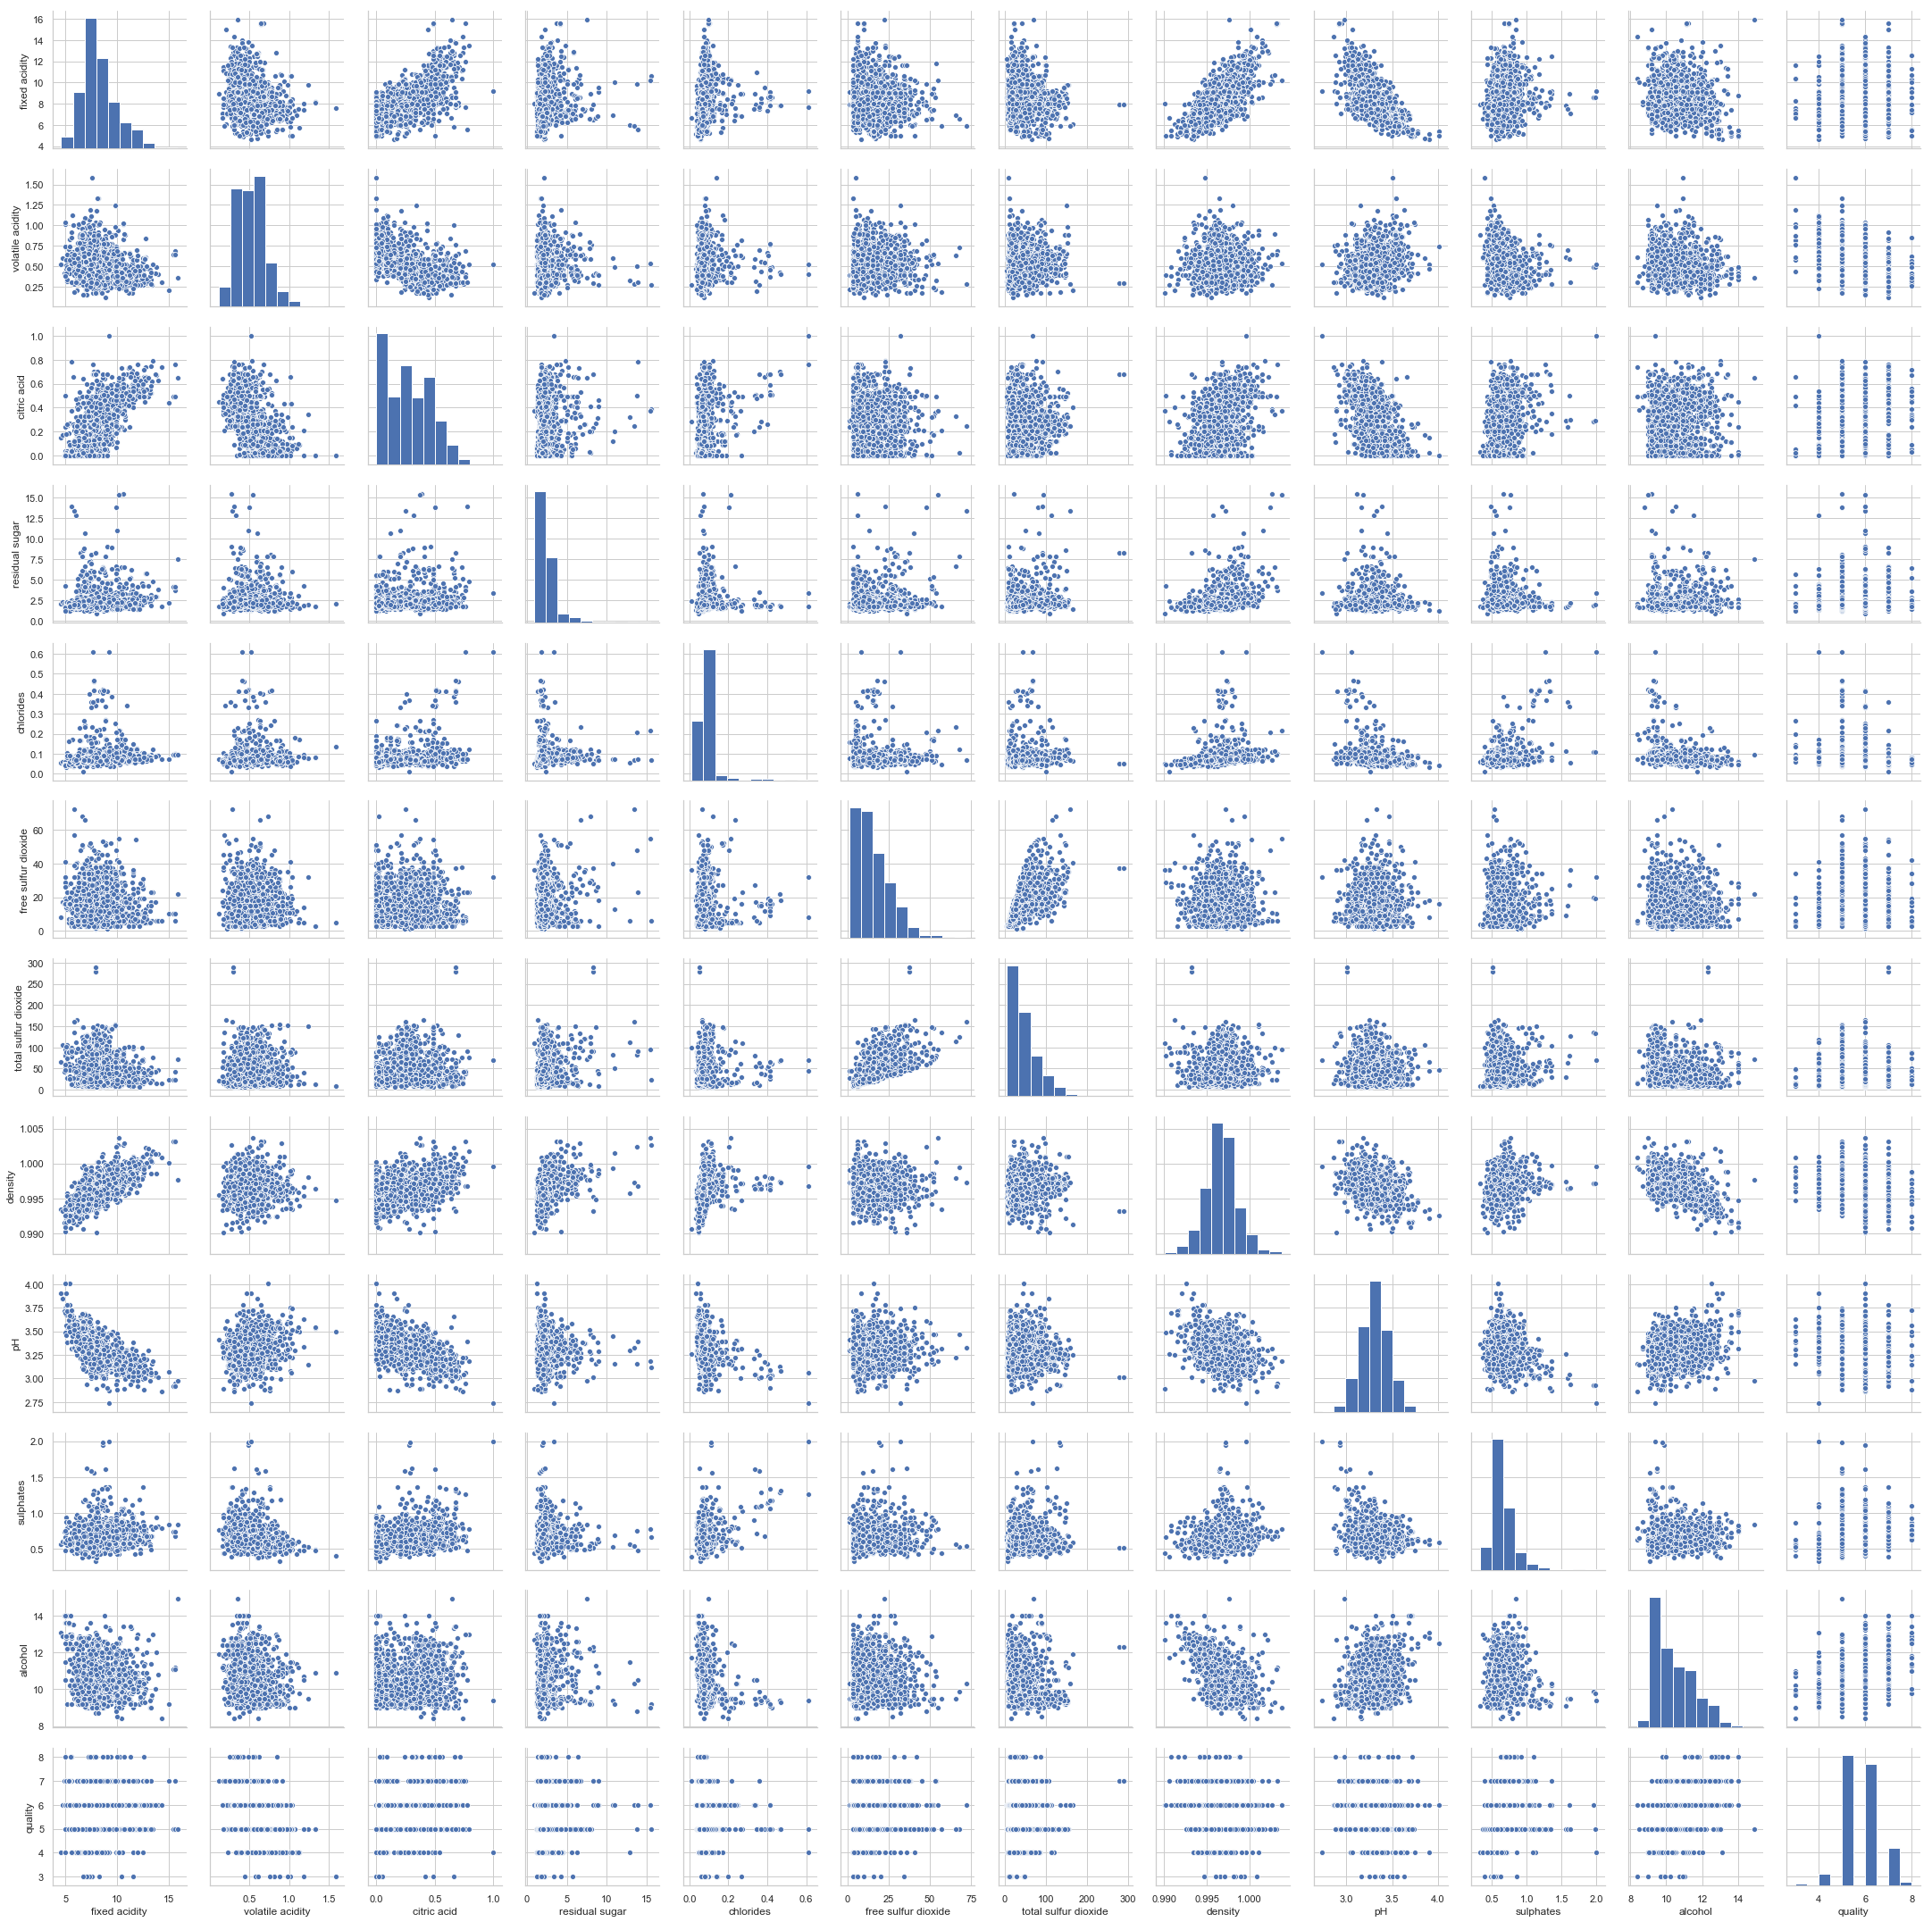

In [14]:
# View scatter plots between variables

sns.pairplot(df)

In [38]:
# Create function to graph data

def graph_data(feature):
    print(Counter(sorted(df[feature])))
    sns.set(rc={'figure.figsize':(12,7.5)})
    sns.countplot(x=feature, data=df, palette = ['crimson'])
    cap_feature = feature.capitalize()
    plt.title('Red Wine ' + cap_feature + ' Count', fontsize=30)
    plt.xlabel(cap_feature, fontsize=24)
    plt.ylabel('Count', fontsize=24)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

Counter({5: 577, 6: 535, 7: 167, 4: 53, 8: 17, 3: 10})


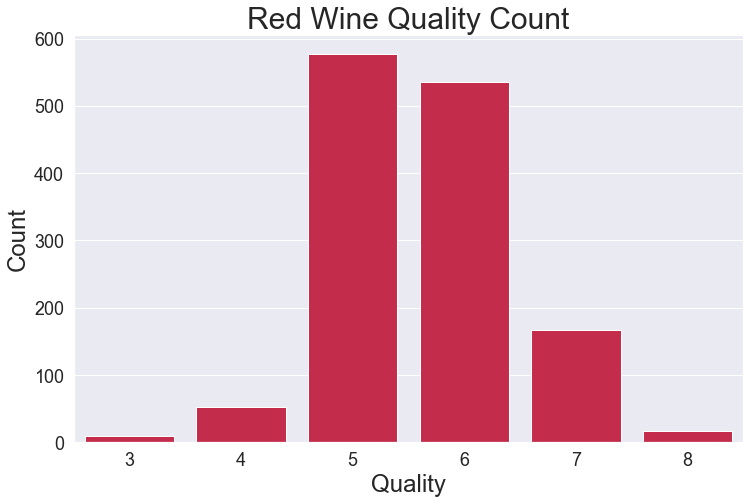

In [39]:
# Investigate unique target values and view quality distribution

graph_data('quality')

In [12]:
# Change 3 & 4 & 5 & 6 to 1 (Bad), change 7 & 8 to 2 (Good)

df['quality'] = df['quality'].replace([3,4, 5, 6],1)
df['quality'] = df['quality'].replace([7,8],2)

Text(0.5, 1.0, 'Bad vs. Good Red Wine')

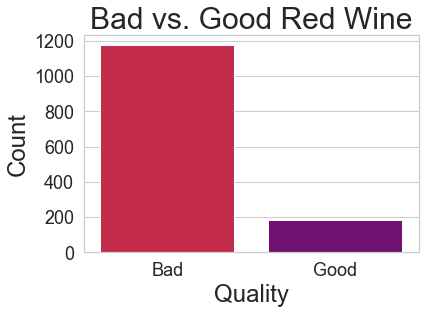

In [13]:
# View 'bad quality' vs. 'good quality' wine distribution

sns.countplot(x='quality', data=df, palette = ['crimson', 'purple'])
plt.xlabel('Quality', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(np.arange(2), labels=['Bad','Good'])
plt.title('Bad vs. Good Red Wine', fontsize=30)

In [14]:
good_bad_dict = dict(Counter(sorted(df['quality'])))
good_bad_df = pd.DataFrame.from_dict(good_bad_dict, orient='index')
good_bad_df = good_bad_df.reset_index()
good_bad_df.columns = ['Quality', 'Count']
good_bad_df['Total %'] = round((good_bad_df['Count']/1359)*100, 2)
good_bad_df['Quality'] = good_bad_df['Quality'].replace(1,'Bad')
good_bad_df['Quality'] = good_bad_df['Quality'].replace(2, 'Good')
good_bad_df

,Quality,Count,Total %
0,Bad,1175,86.46
1,Good,184,13.54


Text(0.5, 1.0, 'Fixed Acidity vs. Quality Red Wine')

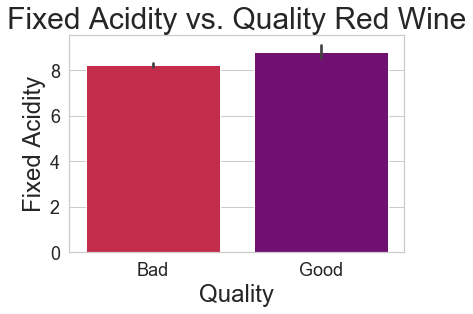

In [15]:
# View 'fixed acidity' across 'quality'

sns.barplot(x='quality',y='fixed acidity',data=df, palette = ['crimson', 'purple']) 
plt.ylabel('Fixed Acidity', fontsize=24)
plt.xlabel('Quality', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(np.arange(2), labels=['Bad','Good'])
plt.title('Fixed Acidity vs. Quality Red Wine', fontsize=30)

Text(0.5, 1.0, 'Volatile Acidity vs. Quality Red Wine')

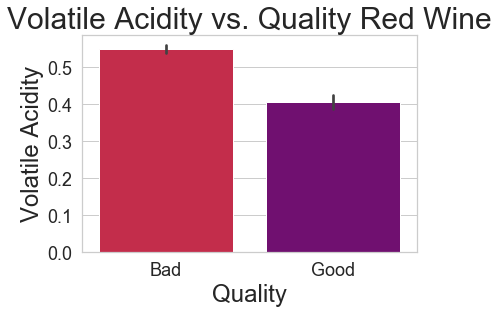

In [16]:
# View 'volatile acidity' across 'quality'

sns.barplot(x='quality',y='volatile acidity',data=df, palette = ['crimson', 'purple']) 
plt.ylabel('Volatile Acidity', fontsize=24)
plt.xlabel('Quality', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(np.arange(2), labels=['Bad','Good'])
plt.title('Volatile Acidity vs. Quality Red Wine', fontsize=30)

Text(0.5, 1.0, 'Citric Acid vs. Quality Red Wine')

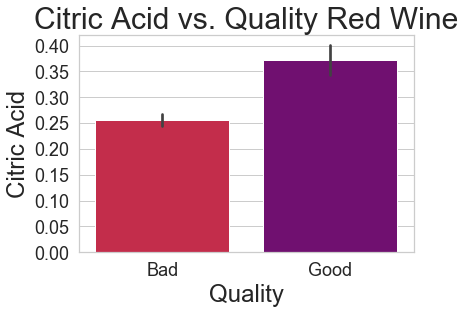

In [17]:
# View 'citric acid' across 'quality'

sns.barplot(x='quality',y='citric acid',data=df, palette = ['crimson', 'purple']) 
plt.ylabel('Citric Acid', fontsize=24)
plt.xlabel('Quality', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(np.arange(2), labels=['Bad','Good'])
plt.title('Citric Acid vs. Quality Red Wine', fontsize=30)

NameError: name 'np' is not defined

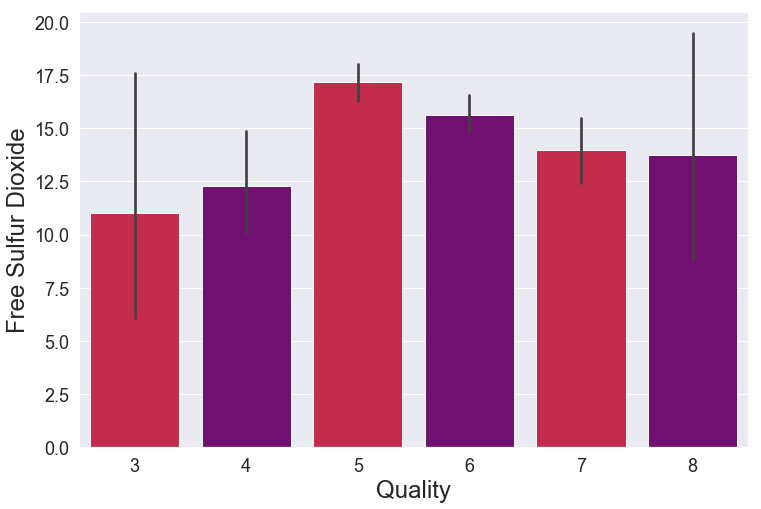

In [20]:
# View 'free sulfur dioxide' across 'quality'

sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x='quality',y='free sulfur dioxide',data=df, palette = ['crimson', 'purple']) 
plt.ylabel('Free Sulfur Dioxide', fontsize=24)
plt.xlabel('Quality', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(np.arange(2), labels=['Bad','Good'])
plt.title('Free Sulfur Dioxide vs. Quality Red Wine', fontsize=30)

Text(0.5, 1.0, 'Total Sulfur Dioxide vs. Quality Red Wine')

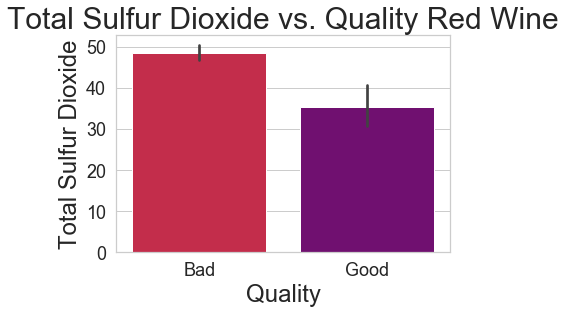

In [19]:
# View 'total sulfur dioxide' across 'quality'

sns.barplot(x='quality',y='total sulfur dioxide',data=df, palette = ['crimson', 'purple']) 
plt.ylabel('Total Sulfur Dioxide', fontsize=24)
plt.xlabel('Quality', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(np.arange(2), labels=['Bad','Good'])
plt.title('Total Sulfur Dioxide vs. Quality Red Wine', fontsize=30)

Text(0.5, 1.0, 'Density vs. Quality Red Wine')

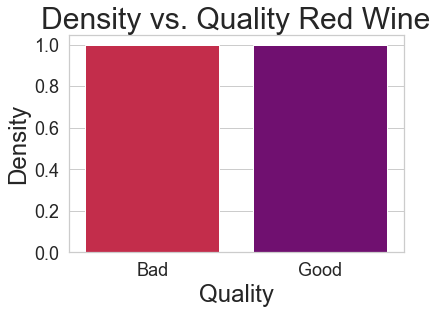

In [20]:
# View 'density' across 'quality'

sns.barplot(x='quality',y='density',data=df, palette = ['crimson', 'purple']) 
plt.ylabel('Density', fontsize=24)
plt.xlabel('Quality', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(np.arange(2), labels=['Bad','Good'])
plt.title('Density vs. Quality Red Wine', fontsize=30)

Text(0.5, 1.0, 'pH vs. Quality Red Wine')

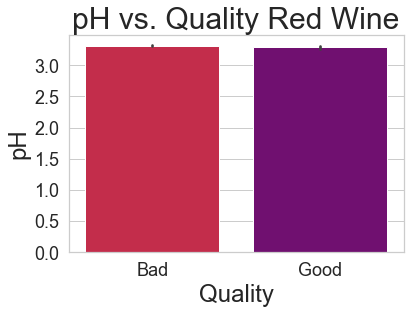

In [21]:
# View 'pH' across 'quality'

sns.barplot(x='quality',y='pH',data=df, palette = ['crimson', 'purple']) 
plt.ylabel('pH', fontsize=24)
plt.xlabel('Quality', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(np.arange(2), labels=['Bad','Good'])
plt.title('pH vs. Quality Red Wine', fontsize=30)

Text(0.5, 1.0, 'Sulphates vs. Quality Red Wine')

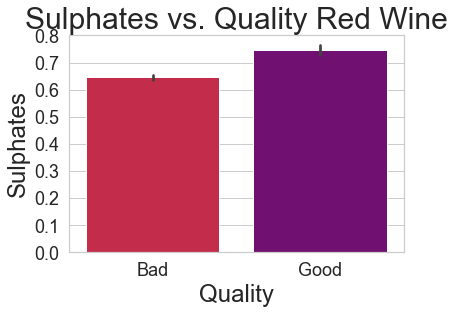

In [22]:
# View 'sulphates' across 'quality'

sns.barplot(x='quality',y='sulphates',data=df, palette = ['crimson', 'purple']) 
plt.ylabel('Sulphates', fontsize=24)
plt.xlabel('Quality', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(np.arange(2), labels=['Bad','Good'])
plt.title('Sulphates vs. Quality Red Wine', fontsize=30)

Text(0.5, 1.0, 'Alcohol vs. Quality Red Wine')

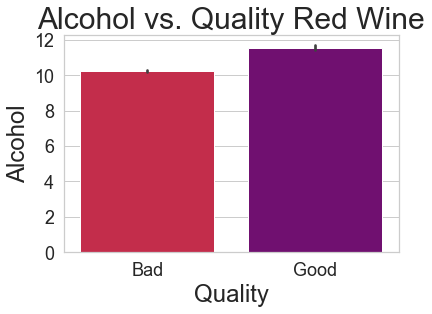

In [23]:
# View 'alcohol' across quality

sns.barplot(x='quality',y='alcohol',data=df, palette = ['crimson', 'purple']) 
plt.ylabel('Alcohol', fontsize=24)
plt.xlabel('Quality', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(np.arange(2), labels=['Bad','Good'])
plt.title('Alcohol vs. Quality Red Wine', fontsize=30)


## Correlation

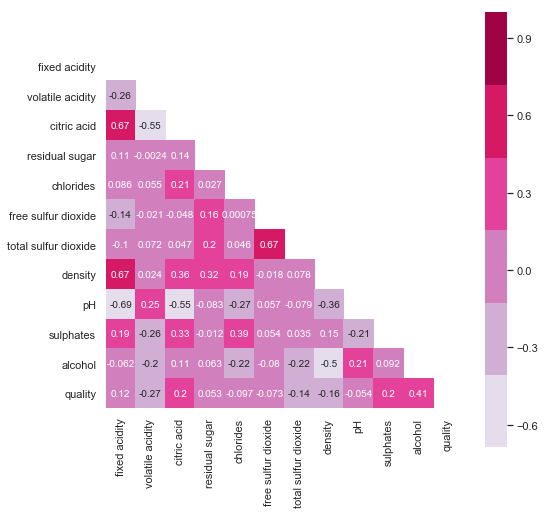

In [24]:
# View correlation among variables using a heatmap

fig,ax = plt.subplots(figsize=(8,8))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
color_map = sns.color_palette("PuRd")
ax = sns.heatmap(df.corr(), cmap=color_map, mask=mask, square=True, annot=True)

In [25]:
# Examine variables with highest correlation to 'quality'

df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.409926
citric acid             0.203561
sulphates               0.201551
fixed acidity           0.116120
residual sugar          0.052811
pH                     -0.054131
free sulfur dioxide    -0.072771
chlorides              -0.096806
total sulfur dioxide   -0.135877
density                -0.158052
volatile acidity       -0.267344
Name: quality, dtype: float64

In [26]:
# Check for multicollinearity 

abs(df.corr()) > 0.95

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,True,False,False,False,False,False,False,False,False,False,False,False
volatile acidity,False,True,False,False,False,False,False,False,False,False,False,False
citric acid,False,False,True,False,False,False,False,False,False,False,False,False
residual sugar,False,False,False,True,False,False,False,False,False,False,False,False
chlorides,False,False,False,False,True,False,False,False,False,False,False,False
free sulfur dioxide,False,False,False,False,False,True,False,False,False,False,False,False
total sulfur dioxide,False,False,False,False,False,False,True,False,False,False,False,False
density,False,False,False,False,False,False,False,True,False,False,False,False
pH,False,False,False,False,False,False,False,False,True,False,False,False
sulphates,False,False,False,False,False,False,False,False,False,True,False,False


### Skewness

In [27]:
# Investigate skewness

df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 2.133662
dtype: float64